In [1]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

<br>

# Matrix decompositions
---

<br>

### LU decomposition

A matrix $A$ can be decomposed as $A = P L U$ where $P$ is a permutation matrix, $L$ is a lower diagonal matrix, $U$ is a upper diagonal matrix. The permutation matrix is not necessary. Example:

&emsp; $A = \begin{pmatrix} 1 & 2 & -1 \\ 4 & 5 & 0 \\ -2 & -1 & 4 \end{pmatrix} = \begin{pmatrix} 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} 1 & 0 & 0 \\ -0.5 & 1 & 0 \\ 0.25 & 0.5 & 1 \end{pmatrix} \begin{pmatrix} 4 & 5 & 0 \\ 0 & 1.5 & 4 \\ 0 & 0 & -3 \end{pmatrix}$

The goal of this decomposition $A = LU$ is to **facilitate the resolution of systems of linear equations** $Ax = b$. Indeed, we can solve these systems using Gaussian Elimination, but this requires $O(N^3)$ steps, with $N$ being the number of rows or columns, because of $O(N)$ row manipulations that each go through half the matrix in average.

In case of repeating evaluation for different $b$, decomposing the matrix $A = PLU$ allows to solve the system more quickly. Indeed, we can solve the system by exploiting the fact that $Ax = P(L(Ux)) = b$:

1. Solve $Pz = b$: we can just permute the rows of $b$ in $O(N)$
2. Solve $Ly = z$: we can get the value of $y$ in $O(N^2)$ by substitution since the gaussian elimination is already done
3. Solve $Ux = y$: we can get the value of $x$ in $O(N^2)$ by substitution since the gaussian elimination is already done

The idea of the LU decomposition is to see $Ax = b$ as $IAx = b$ and then perform scaling or row addition operations on $A$ as we do for Gaussian elimination, which can be represented as matrices $E_i$, and apply the reverse transformation on $I$:

&emsp; $IAx=b \implies (IE_0^{-1})(E_0A)x = b \implies (E_0^{-1} .. E_n^{-1})(E_n .. E_0 A)x = b \implies LUx=b$

The technical trick we can use to do so is to draw the matrices $A$ and $I$ side by side, and doing the reverse operations:

* divising by $k$ the row of $I$ when $A$'s row is multiplied by $k$
* substracting row $k$ to row $j$ in $I$ when $A$'s row $k$ is adding to row $j$ (only for eliminated column)

**Example**:

We start with our $U$ matrix being equal to $A$, and $L$ as the identity matrix:

&emsp; $U = \begin{pmatrix} 1 & 2 & -1 \\ 4 & 5 & 0 \\ -2 & -1 & 4 \end{pmatrix} L = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}$

Gaussian elimination of the first column:

&emsp; $U = \begin{pmatrix} 1 & 2 & -1 \\ 0 & -3 & 4 \\ 0 & 3 & 2 \end{pmatrix} L = \begin{pmatrix} 1 & 0 & 0 \\ \boldsymbol{4} & 1 & 0 \\ \boldsymbol{-2} & 0 & 1 \end{pmatrix}$

Gaussian elimination of the second column:

&emsp; $U = \begin{pmatrix} 1 & 2 & -1 \\ 0 & -3 & 4 \\ 0 & 0 & 6 \end{pmatrix} L = \begin{pmatrix} 1 & 0 & 0 \\ 4 & 1 & 0 \\ -2 & \boldsymbol{-1} & 1 \end{pmatrix}$

**Note:** The LU decomposition can also be used to compute the determinant faster (because the determinant is factorial complexity in general, but linear complexity for diagonal or triangular matrices).

In [36]:
A = np.array([
    [1, 2, -1],
    [4, 5, 0],
    [-2, -1, 4]])

permutation, lower_diag, upper_diag = scipy.linalg.lu(A)
print(permutation)
print(lower_diag)
print(upper_diag)
print(permutation @ lower_diag @ upper_diag)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[ 1.    0.    0.  ]
 [-0.5   1.    0.  ]
 [ 0.25  0.5   1.  ]]
[[ 4.   5.   0. ]
 [ 0.   1.5  4. ]
 [ 0.   0.  -3. ]]
[[ 1.  2. -1.]
 [ 4.  5.  0.]
 [-2. -1.  4.]]


<br>

### QR decomposition

Decomposition of the matrix $A = QR$ as an orthogonal matrix $Q$ and a upper right triangular matrix $R$.

This decomposition helps solving system of linear equations: $Ax = b$ becomes $Rx = Q^T b$ (because the inverse of an orthogonal matrix is its transpose) which is easier to solve since $R$ is triangular. If noise *n* is added: $Ax = b + n$ becomes $Rx = Q^T b + Q^T n$, which keeps some nice properties of the covariance matrix of the noise:

&emsp; $E[n n^T] = \text{covariance of noise} = \sigma^2 I \implies E[Q^T n n^T Q] = Q^T E[n n^T] Q = \sigma^2 I$

In case of white independent noise across dimension, this property is pretty interesting.

**Gram-Schmidt process:**

&emsp; $A = (a_1, a_2, ... a_n)$
&emsp; $Q = (e_1, e_2, ... e_n)$

Initialization phase:

&emsp; $\displaystyle e_1 = \frac{a_1}{\Vert a_1 \Vert} \implies a_1 = \langle a_1, e_1 \rangle e_1$

Then for each $a_j$ (increasing $j$), remove the projections on the already existing vectors $e_i, \forall i < j$, and normalize:

&emsp; $\displaystyle e_j = \frac{u_j}{\Vert u_j \Vert} = \frac{a_j - \sum_{i=0}^{j-1} \langle a_j, e_i \rangle e_i}{\Vert a_j - \sum_{i=0}^{j-1} \langle a_j, e_i \rangle e_i \Vert} \implies a_j = \sum_{i=0}^{j} \langle a_j, e_i \rangle e_i$

And we have $R$:

&emsp; $\displaystyle R={\begin{pmatrix}\langle e_1, a_1 \rangle &\langle e_1,a_2 \rangle & \ldots \\ 0 & \langle e_2, a_2 \rangle & \ldots \\ \vdots & \vdots &\ddots \end{pmatrix}}$

**Example:**

&emsp; $A = \begin{pmatrix} 3 & 1 \\ 4 & 1 \end{pmatrix}$
&emsp; $a_1 = \begin{pmatrix} 3 \\ 4 \end{pmatrix}$
&emsp; $a_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$

&emsp; $u_1 = \begin{pmatrix} 3 \\ 4 \end{pmatrix}$
&emsp; $\Vert u_1 \Vert = 5$

&emsp; $e_1 = \begin{pmatrix} \frac{3}{5} \\ \frac{4}{5} \end{pmatrix}$

&emsp; $u_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix} - \frac{7}{5} \begin{pmatrix} \frac{3}{5} \\ \frac{4}{5} \end{pmatrix} = \begin{pmatrix} \frac{4}{25} \\ \frac{-3}{25} \end{pmatrix}$
&emsp; $\displaystyle \Vert u_2 \Vert = \frac{1}{5}$

&emsp; $e_2 = \begin{pmatrix} \frac{4}{5} \\ \frac{-3}{5} \end{pmatrix}$

And so we have:

&emsp; $Q = \begin{pmatrix} \frac{3}{5} & \frac{4}{5} \\ \frac{4}{5} & \frac{-3}{5} \end{pmatrix}$
&emsp; $R = \begin{pmatrix} 5 & \frac{7}{5} \\ 0 & \frac{1}{5} \end{pmatrix}$

<br>

### Diagonalisation / Eigen decomposition / Spectral decomposition

A matrix of rank $N$ always has $N$ non-zero complex eigen values. Real eigen values correspond to scaling. Complex eigen values correspond to rotations (plus scaling). Such matrices can be decomposed as:

&emsp; $A = U \Lambda U^{-1}$, where $U$ are the eigen vectors, and $\Lambda$ contains the eigen values $\Lambda_{ii} = \lambda_i$

Let's prove it! For each eigen vector $v_i$, we have $A v_i = \lambda_i v_i$. If we assemble these eigen vectors into a matrix, we get the formula:

&emsp; $A U = U \Lambda$ (each column of  Λ  multiplies the only eigen vector it matches) $\implies A = U \Lambda U^{-1}$

**Example:**

&emsp; $A = \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}$ has two eigenvalues $\lambda_0 = 1$ and $\lambda_1 = 3$ with eigenvectors $v_0 = (1, -1)$ and $v_1 = (1, 1)$

&emsp; $A U = U \Lambda \implies \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix} \begin{pmatrix} 1 & 1 \\ -1 & 1 \end{pmatrix} = \begin{pmatrix} 1 & 1 \\ -1 & 1 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & 3 \end{pmatrix}$

In [39]:
A = np.array([
    [2, 1],
    [1, 2]])

U = np.array([
    [1, 1],
    [-1, 1]])

D = np.diag([1, 3])

print(A @ U)
print(U @ D)

[[ 1  3]
 [-1  3]]
[[ 1  3]
 [-1  3]]


<br>

### Symmetric matrices

Symmetric matrices have real eigenvalues $\lambda_i$ and we can always find orthonormal eigenvectors $q_i$ that form a basis of their column space. If we assemble the vectors $q_i$ as column vectors of a matrix $Q$, we have the factorization:

&emsp; $S = Q \Lambda Q^T$, where $\Lambda$ contains the eigen values $\Lambda_{ii} = \lambda_i$

Let's prove it! For each eigen vectors $q_i$, we have $S q_i = \lambda_i q_i$. If we assemble these eigen vectors into a matrix, we get the formula (where $\Lambda$ is diagonal with $\Lambda_{ii} = \lambda_i$):

&emsp; $S Q = Q \Lambda$ (each column of $\Lambda$ multiplies the only eigen vector it matches)

&emsp; $S = Q \Lambda Q^T$ (since $Q Q^T = I$)

&emsp; $S = \sum_i^N \lambda_i q_i q_i^T$

<br>

### Singular Value Decomposition

For any matrix, of any shape, we can always decompose the matrix as: $A = U \Sigma V^T$, where:

* $V$ is orthogonal and contains the eigen values of $A^T A$, with eigen values $\lambda_i$
* $U$ is orthogonal and contains the eigen values of $A A^T$
* $\Sigma$ is diagonal and contains the singular values $\Sigma_{ii} = \sigma_i$ such that $\sigma_i = \sqrt{\lambda_i}$

Let's prove it! We know that $A^T A$ is symmetric and positive definite (meaning that $x^T A^T A x$ is strictly positive for non-zero vectors $x$), which implies that its eigenvalues are positive, and so we can always decompose it as:

&emsp; $A^T A = V \Lambda V^T$

If we take the vectors $v_i$ of $V$ and multiply these vectors to $A$, we get something of that form:

&emsp; $A v_i = \sigma_i u_i$, where $||u_i|| = 1$

Now we can prove that the vectors $u_i$ are orthonormal:

&emsp; $(A v_j)^T A v_i = v_j^T A^T A v_i = \lambda_i v_j^T v_i = \lambda_i \delta_{ij}$ (because $v_i$ is an eigen vector of $A^T A$)

&emsp; $(A v_j)^T A v_i = \sigma_j \sigma_i u_j^T u_j \implies u_j^T u_i = \delta_{ij}$ and $\lambda_i = \sigma_i^2$

And so, by bulking the products for all the eigen vectors, we get:

&emsp; $A V = U \Sigma \implies A = U \Sigma V^T$ (because $V$ is orthnormal)

Finally, we can prove that $U$ contains eigen vectors of $A A^T$ by multiplying the whole:

&emsp; $A A^T = U \Sigma V^T V \Sigma^T U^T = U \Sigma \Sigma^T U^T$

&emsp; $A A^T U = U \Lambda'$ where $\Lambda' = \Sigma \Sigma^T$ is diagonal

<br>

### SVD Example:

&emsp; $A = \begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{pmatrix} \implies A^T = \begin{pmatrix} 1 & 0 & 1 \\ 0 & 1 & 1 \end{pmatrix}$

We compute the product of $A^T A$ to get a symmetric matrix and do an eigen decomposition:

&emsp; $A^T A = \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}$ has two eigenvalues $\lambda_0 = 1$ and $\lambda_1 = 3$ with eigenvectors $v_0 = (\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}})$ and $v_1 = (\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}})$

We can check that $v_0$ and $v_1$ are normalized and orthogonal to each other, and then build our first two matrices:

&emsp; $V = \begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{pmatrix} \implies V^T = \begin{pmatrix} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{pmatrix}$

Now we multiply the column vectors of $V$ to $A$ to get the vectors of $U$:

&emsp; $\begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \\ 0 \end{pmatrix} = u_0$

&emsp; $\begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \\ \frac{2}{\sqrt{2}} \end{pmatrix} = \sqrt{3} \begin{pmatrix} \frac{1}{\sqrt{6}} \\ \frac{1}{\sqrt{6}} \\ \frac{\sqrt{2}}{\sqrt{3}} \end{pmatrix} = \sqrt{3} u_1$

We therefore have the decomposition (which is quite useful):

&emsp; $A = \begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} \\ 0 & \frac{2}{\sqrt{6}} \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & \sqrt{3} \end{pmatrix} \begin{pmatrix} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{pmatrix}$

To complete the SVD decomposition, we need to make $U$ and $V$ square orthonormal matrices, completing with orthogonal vectors if necessary:

&emsp; $A = \begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{3}} \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{3}} \\ 0 & \frac{2}{\sqrt{6}} & \frac{1}{\sqrt{3}} \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & \sqrt{3} \\ 0 & 0 \end{pmatrix} \begin{pmatrix} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{pmatrix}$


In [53]:
A = np.array([
    [1, 0],
    [0, 1],
    [1, 1]
])

u, s, vt = np.linalg.svd(A, compute_uv=True, full_matrices=False)
print(u)
print(np.diag(s))
print(vt)
print(u @ np.diag(s) @ vt)

u, s, vt = np.linalg.svd(A, compute_uv=True, full_matrices=True)
print(u)
print(np.diag(s))
print(vt)

[[-4.08248290e-01  7.07106781e-01]
 [-4.08248290e-01 -7.07106781e-01]
 [-8.16496581e-01 -1.22629285e-16]]
[[1.73205081 0.        ]
 [0.         1.        ]]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
[[ 1.00000000e+00 -1.65911125e-16]
 [ 6.22328532e-19  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00]]
[[-4.08248290e-01  7.07106781e-01 -5.77350269e-01]
 [-4.08248290e-01 -7.07106781e-01 -5.77350269e-01]
 [-8.16496581e-01 -1.22629285e-16  5.77350269e-01]]
[[1.73205081 0.        ]
 [0.         1.        ]]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


<br>

# Example: Page Rank
---

The idea behind page rank:

* represent the graph of links as a adjacency matrix
* look for the page that are eigen values of this matrix

Why? Because if a link points at nothing but itself, then it will be the case that $Ax = x$. This way you get at the source of the information.

**Stochastic approach**: **TODO** start at any point and follow the link until you find a sink.

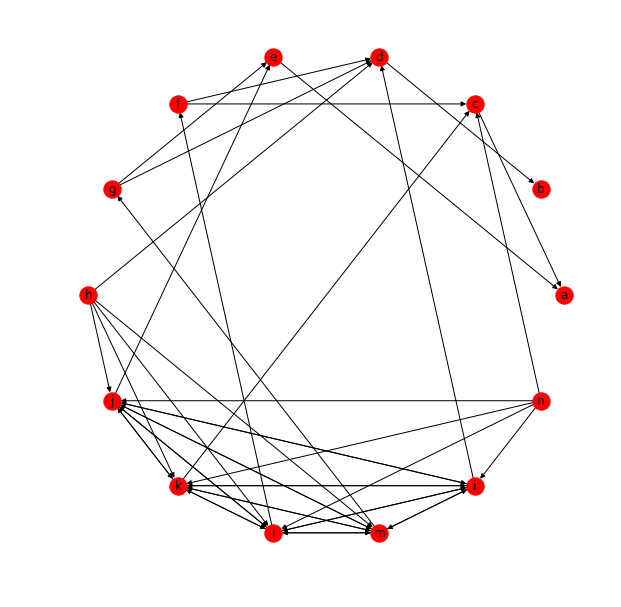

In [2]:
def draw_graph(g):
    gx = nx.DiGraph()
    for a, neigh in g.items():
        gx.add_node(a)
        for b in neigh:
            gx.add_edge(a, b)
    nx.draw_circular(gx, with_labels=True)
    
g = {}

# The node with the information
g['a'] = []
g['b'] = []

# Sites that relate toward the main nodes
g['c'] = ['a']
g['d'] = list("b")
g['e'] = list("a")
g['f'] = list("cd")
g['g'] = list("de")

# Cluster of sites that all reference each other
g['h'] = list("djklm")
g['i'] = list("djklm")
g['j'] = list("eiklm")
g['k'] = list("cijlm")
g['l'] = list("fijkm")
g['m'] = list("gijkl")
g['n'] = list("cijkl")

# Drawing the result
plt.figure(figsize=(8,8))
draw_graph(g)

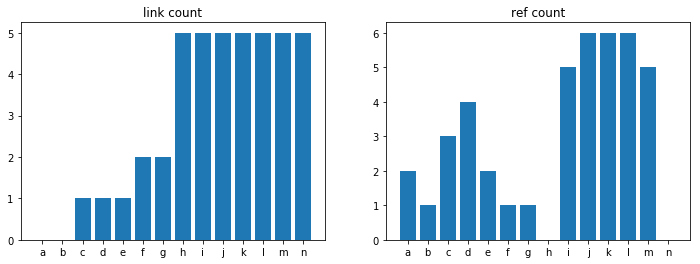

In [3]:
def reverse_graph(g):
    gr = {}
    for a, neigh in g.items():
        for b in neigh:
            gr.setdefault(b, []).append(a)
    return gr

def draw_link_count(g):
    gr = reverse_graph(g)
    site = []
    ref_count = []
    link_count = []
    for k, v in sorted(g.items()):
        site.append(k)
        link_count.append(len(v))
        ref_count.append(len(gr.get(k, [])))

    _, ax = plt.subplots(figsize=(12,4), ncols=2)
    ax[0].bar(site, link_count)
    ax[0].set_title('link count')
    ax[1].bar(site, ref_count)
    ax[1].set_title('ref count')
    plt.plot()
    
draw_link_count(g)

In [4]:
N = len(g)
adj_matrix = np.zeros(shape=(N, N))
for a, neigh in g.items():
    a = ord(a)-ord('a')
    adj_matrix[a,a] = 1
    for b in neigh:
        b = ord(b)-ord('a')
        adj_matrix[b,a] = 1
print(adj_matrix)

[[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [5]:
for i in range(N):
    x = np.zeros(N)
    x[i] = 1
    y = adj_matrix @ x
    if np.array_equal(y, x):
        print(x)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
def eigen_vectors(m):
    vals, vects = np.linalg.eig(m)
    idx = np.argsort(vals)
    idx = idx[vals[idx] > 0]
    return vals[idx[::-1]], vects.T[idx[::-1]]

eigen_vectors(adj_matrix)

(array([5., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([[ 6.66607415e-02,  3.99964449e-02,  1.33321483e-01,
          1.59985780e-01,  1.33321483e-01,  1.06657186e-01,
          1.06657186e-01,  0.00000000e+00,  4.26628746e-01,
          4.26628746e-01,  4.26628746e-01,  4.26628746e-01,
          4.26628746e-01,  0.00000000e+00],
        [ 7.07106781e-01,  7.07106781e-01, -3.48630560e-32,
         -1.57009246e-16, -1.57009246e-16,  0.00000000e+00,
          3.48630560e-32,  0.00000000e+00, -4.87496176e-65,
         -4.87496176e-65, -4.87496176e-65, -4.87496176e-65,
         -7.74115349e-48,  7.74115349e-48],
        [-7.07106781e-01, -7.07106781e-01,  2.35513869e-16,
          1.57009246e-16, -7.85046229e-17, -5.22945840e-32,
          1.74315280e-32,  1.39452224e-31, -1.39452224e-31,
          7.74115349e-48,  5.80586512e-48,  7.74115349e-48,
         -4.74877178e-48,  0.00000000e+00],
        [ 7.07106781e-01,  7.07106781e-01,  0.00000000e+00,
         -1.57009246e-16, -1.57009246e

['a', 'b', 'm', 'l', 'k', 'j', 'i', 'd', 'e', 'c', 'g', 'f', 'h', 'n']
[6.16173083e+00 5.02840935e+00 2.13314373e+00 2.13314373e+00
 2.13314373e+00 2.13314373e+00 2.13314373e+00 7.99928898e-01
 6.66607415e-01 6.66607415e-01 5.33285932e-01 5.33285932e-01
 1.39452224e-31 7.74115349e-48]


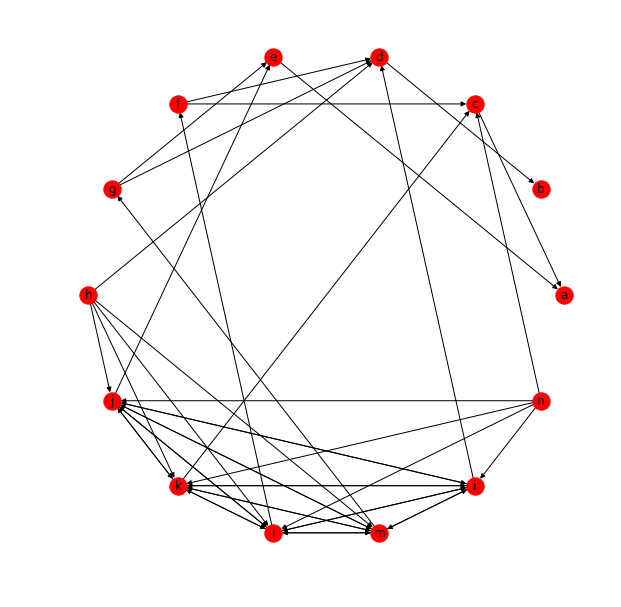

In [9]:
def rank_pages(m):
    scores = np.zeros(N)
    vals, vects = eigen_vectors(adj_matrix)
    for i in range(len(vals)):
        for d in range(N):
            scores[d] += abs(vals[i]) * abs(vects[i,d])
    idx = np.argsort(scores)[::-1]
    return idx, scores[idx]

pages, scores = rank_pages(adj_matrix)
print([chr(p+ord('a')) for p in pages])
print(scores)

plt.figure(figsize=(8,8))
draw_graph(g)